## Compreendendo o dataset movies.csv (filmes)
### colunas = ["filmeId", "titulo", "generos"]
#### .set_index("filmeId)

In [1]:
import pandas as pd 
filmes = pd.read_csv('../movies.csv')
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.set_index("filmeId")

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
...,...,...
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
193585,Flint (2017),Drama


## Dataset complementar ratings.csv (notas)
### colunas = ["usuarioId", "filmeId", "nota", "momento"]

In [2]:
notas = pd.read_csv('../ratings.csv')
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]

### Describe

In [3]:
notas.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


# Primeira abordagem de recomendação: heurística de total de votos (value_counts)

In [4]:
total_de_votos = notas["filmeId"].value_counts()
print(total_de_votos)

356       329
318       317
296       307
593       279
2571      278
         ... 
86279       1
86922       1
5962        1
87660       1
163981      1
Name: filmeId, Length: 9724, dtype: int64


### Adicionando o total de votos como coluna do dataset filmes

In [5]:
filmes['total_de_votos'] = total_de_votos

### Ordenando o dataset de filmes por total de votos decrescente

In [6]:
filmes.sort_values("total_de_votos", ascending = False).head(10)

,filmeId,titulo,generos,total_de_votos
356,412,"Age of Innocence, The (1993)",Drama,329.0
318,360,I Love Trouble (1994),Action|Comedy,317.0
296,338,Virtuosity (1995),Action|Sci-Fi|Thriller,307.0
593,735,Cemetery Man (Dellamorte Dellamore) (1994),Horror,279.0
2571,3439,Teenage Mutant Ninja Turtles II: The Secret of...,Action|Children|Fantasy,278.0
260,300,Quiz Show (1994),Drama,251.0
480,548,Terminal Velocity (1994),Action|Mystery|Thriller,238.0
110,128,Jupiter's Wife (1994),Documentary,237.0
589,726,Last Dance (1996),Drama,224.0
527,616,"Aristocats, The (1970)",Animation|Children,220.0


### Agrupando o dataset notas por filmeId e agregando por média obtendo a coluna "nota"

In [7]:
notas_medias = notas.groupby("filmeId").mean()["nota"]

### Adicionando as notas_medias como coluna do dataset filmes

In [8]:
filmes['notas_media'] = notas_medias
filmes.sort_values("total_de_votos", ascending = False).head(10)

,filmeId,titulo,generos,total_de_votos,notas_media
356,412,"Age of Innocence, The (1993)",Drama,329.0,4.164134
318,360,I Love Trouble (1994),Action|Comedy,317.0,4.429022
296,338,Virtuosity (1995),Action|Sci-Fi|Thriller,307.0,4.197068
593,735,Cemetery Man (Dellamorte Dellamore) (1994),Horror,279.0,4.161290
2571,3439,Teenage Mutant Ninja Turtles II: The Secret of...,Action|Children|Fantasy,278.0,4.192446
260,300,Quiz Show (1994),Drama,251.0,4.231076
480,548,Terminal Velocity (1994),Action|Mystery|Thriller,238.0,3.750000
110,128,Jupiter's Wife (1994),Documentary,237.0,4.031646
589,726,Last Dance (1996),Drama,224.0,3.970982
527,616,"Aristocats, The (1970)",Animation|Children,220.0,4.225000


# Uma segunda heurística: nota média com filtro de votos

In [9]:
filmes.sort_values("notas_media", ascending = False).head(10)

,filmeId,titulo,generos,total_de_votos,notas_media
6611,55805,Before the Devil Knows You're Dead (2007),Crime|Drama|Thriller,1.0,5.0
5328,8861,Resident Evil: Apocalypse (2004),Action|Horror|Sci-Fi|Thriller,1.0,5.0
8238,104243,Riddick (2013),Action|Sci-Fi|Thriller|IMAX,1.0,5.0
3096,4156,Company Man (2000),Comedy,1.0,5.0
3086,4143,Valentine (2001),Horror|Mystery,1.0,5.0
1140,1493,Love and Other Catastrophes (1996),Romance,1.0,5.0
1151,1514,Temptress Moon (Feng Yue) (1996),Romance,2.0,5.0
3073,4126,Less Than Zero (1987),Drama,1.0,5.0
4454,6577,Kickboxer 2: The Road Back (1991),Action|Drama,1.0,5.0
4495,6654,Atragon (Kaitei Gunkan) (1963),Adventure|Sci-Fi,1.0,5.0


### Pelo menos 10 votos

In [10]:
filmes.query("total_de_votos >= 10").sort_values("notas_media", ascending = False).head(10)

,filmeId,titulo,generos,total_de_votos,notas_media
1041,1353,"Mirror Has Two Faces, The (1996)",Comedy|Drama|Romance,11.0,4.590909
3451,4708,Marat/Sade (1966),Drama|Musical,11.0,4.545455
1178,1569,My Best Friend's Wedding (1997),Comedy|Romance,12.0,4.541667
1104,1437,"Cement Garden, The (1993)",Drama,20.0,4.475000
2360,3127,Holy Smoke (1999),Comedy|Drama,12.0,4.458333
1217,1616,"Peacemaker, The (1997)",Action|Thriller|War,15.0,4.433333
318,360,I Love Trouble (1994),Action|Comedy,317.0,4.429022
951,1252,Chinatown (1974),Crime|Film-Noir|Mystery|Thriller,14.0,4.392857
1927,2555,Baby Geniuses (1999),Comedy,10.0,4.350000
3468,4732,Bubble Boy (2001),Comedy,18.0,4.333333


### Filmes com mais de 50 votos

In [11]:
filmes_com_mais_de_50_votos = filmes.query("total_de_votos >= 50").sort_values("notas_media", ascending = False).head(10)
filmes_com_mais_de_50_votos.sort_values("notas_media", ascending = False).head(10)


,filmeId,titulo,generos,total_de_votos,notas_media
318,360,I Love Trouble (1994),Action|Comedy,317.0,4.429022
858,1129,Escape from New York (1981),Action|Adventure|Sci-Fi|Thriller,192.0,4.289062
2959,3967,Billy Elliot (2000),Drama,218.0,4.272936
1276,1693,Amistad (1997),Drama|Mystery,57.0,4.271930
750,984,"Pompatus of Love, The (1996)",Comedy|Drama,97.0,4.268041
904,1202,Withnail & I (1987),Comedy,84.0,4.261905
1221,1621,Soul Food (1997),Drama,129.0,4.259690
1213,1612,"Kiss Me, Guido (1997)",Comedy,126.0,4.250000
912,1211,"Wings of Desire (Himmel über Berlin, Der) (1987)",Drama|Fantasy|Romance,100.0,4.240000
50,55,Georgia (1995),Drama,204.0,4.237745


### Filtro de filmes que "eu" assisti

In [12]:
eu_assisti = [1, 21, 19, 10, 11, 7, 2]
filmes.loc[eu_assisti]

,filmeId,titulo,generos,total_de_votos,notas_media
1,2,Jumanji (1995),Adventure|Children|Fantasy,215.0,3.920930
21,22,Copycat (1995),Crime|Drama|Horror|Mystery|Thriller,89.0,3.494382
19,20,Money Train (1995),Action|Comedy|Crime|Drama|Thriller,88.0,2.727273
10,11,"American President, The (1995)",Comedy|Drama|Romance,132.0,3.496212
11,12,Dracula: Dead and Loving It (1995),Comedy|Horror,70.0,3.671429
7,8,Tom and Huck (1995),Adventure|Children,54.0,3.185185
2,3,Grumpier Old Men (1995),Comedy|Romance,110.0,3.431818


### Filtro de filmes por gênero ordenado pela nota média

In [13]:
aventura_infantil_e_fantasia = filmes_com_mais_de_50_votos.query("generos=='Adventure|Children|Fantasy'")
aventura_infantil_e_fantasia.drop(eu_assisti, errors='ignore').sort_values("notas_media", ascending = False).head(10)

,filmeId,titulo,generos,total_de_votos,notas_media


# Abordagens Collaborative filtering x Content based filtering

# Procurar usuários "similares" (Collaborative Filtering)

- joão deu nota 4 no filme toy story
- maria deu nota 5 no filme toy story
- paulo deu nota 3 no filme toy story
- joana deu nota 3.5 no filme toy story

x-y ==> distância

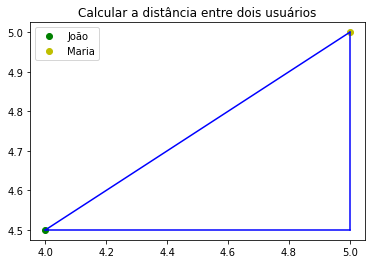

In [14]:
import matplotlib.pyplot as plt
plt.plot(4, 4.5, "go")
plt.plot(5, 5, "yo")
plt.legend(["João", "Maria"])
plt.title("Calcular a distância entre dois usuários")

plt.plot([4, 5], [4.5, 5], color="b", linestyle="-")
plt.plot([4, 5], [4.5, 4.5], color="b", linestyle="-")
plt.plot([5, 5], [4.5, 5], color="b", linestyle="-")

### Diferença linear entre 2 usuários

In [15]:
import numpy as np

joao = np.array([4, 4.5])
maria = np.array([5, 5])

joao - maria

array([-1. , -0.5])

### O Teorema de Pitágoras pode ser implementado com a raiz quadrada da soma entre os produtos dos catetos

In [16]:
from math import sqrt

def pitagoras(a,b):
  (delta_x, delta_y) = a - b
  return sqrt(delta_x * delta_x + delta_y * delta_y)

pitagoras(joao, maria)

1.118033988749895

In [17]:
def pitagoras(a,b):
    return np.linalg.norm(a - b)

pitagoras(joao, maria)

1.118033988749895

### Exemplos

Text(0.5, 1.0, 'Calcular a distância entre usuários')

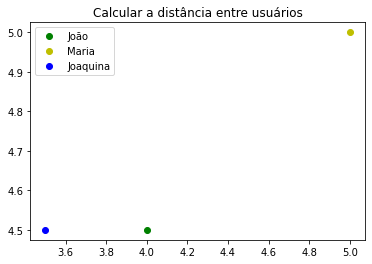

In [18]:
import matplotlib.pyplot as plt
plt.plot(4, 4.5, "go")
plt.plot(5, 5, "yo")
plt.plot(3.5, 4.5, "bo")
plt.legend(["João", "Maria", "Joaquina"])
plt.title("Calcular a distância entre usuários")


In [19]:
joaquina = np.array([3.5, 4.5])

print(pitagoras(joao, maria))
print(pitagoras(joao, joaquina))

1.118033988749895
0.5


# Distância entre usuários do dataset

In [20]:
def distancia_de_vetores(a,b):
    return np.linalg.norm(a - b)


### Busca as notas de um dado usuário e retorna associado ao filmeId

In [21]:
def notas_do_usuario(usuario):
    notas_do_usuario = notas.query("usuarioId==%d" % usuario)
    notas_do_usuario = notas_do_usuario[["filmeId", "nota"]].set_index("filmeId")
    
    return notas_do_usuario

### Teste

In [22]:
usuario1 = notas_do_usuario(1)
usuario4 = notas_do_usuario(4)

In [23]:
usuario1

,nota
filmeId,
1,4.0
3,4.0
6,4.0
47,5.0
50,5.0
...,...
3744,4.0
3793,5.0
3809,4.0


In [24]:
usuario4

,nota
filmeId,
21,3.0
32,2.0
45,3.0
47,2.0
52,3.0
...,...
4765,5.0
4881,3.0
4896,4.0


### Calcular as diferenças das notas de 2 usuários

In [25]:
diferencas = usuario1.join(usuario4, lsuffix="_esquerda", rsuffix="_direita").dropna()
distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])

11.135528725660043

### Distância entre 2 usuários em uma função

In [26]:
def distancia_de_usuarios(usuario_id1, usuario_id2):
    notas1 = notas_do_usuario(usuario_id1)
    notas2 = notas_do_usuario(usuario_id2)
    diferencas = notas1.join(notas2, lsuffix="_esquerda", rsuffix="_direita").dropna()
    distancia =  distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])
    return [usuario_id1, usuario_id2, distancia]

### Teste

In [27]:
distancia_de_usuarios(1,4)

[1, 4, 11.135528725660043]

### Quantos usuários únicos temos no dataset

In [28]:
quantidade_de_usuarios = len(notas['usuarioId'].unique())
print("Temos %d usuarios" % quantidade_de_usuarios)

Temos 610 usuarios


### Percorrendo todos os usuários e armazenando a distância

In [29]:
def distancia_de_todos(voce_id):
    distancias = []
    for usuario_id in notas['usuarioId'].unique():
        distancia_entre_dois_usuarios = distancia_de_usuarios(voce_id, usuario_id)
        distancias.append(distancia_entre_dois_usuarios)
    return distancias

distancia_de_todos(1)[:5]
#eu, outro user, distancia

[[1, 1, 0.0],
 [1, 2, 1.4142135623730951],
 [1, 3, 8.200609733428363],
 [1, 4, 11.135528725660043],
 [1, 5, 3.7416573867739413]]

### Utilizando uma lista para criar um dataframe de distancias

In [30]:
def distancia_de_todos(voce_id):
    todos_os_usuarios = notas['usuarioId'].unique()
    distancias = [distancia_de_usuarios(voce_id, usuario_id) for usuario_id in todos_os_usuarios]
    distancias = pd.DataFrame(distancias, columns = ["voce", "outra_pessoa", "distancia"])
    return distancias

distancia_de_todos(1).head()

,voce,outra_pessoa,distancia
0,1,1,0.000000
1,1,2,1.414214
2,1,3,8.200610
3,1,4,11.135529
4,1,5,3.741657


### Diferença das notas de um usuário para outro

In [31]:
notas_do_usuario(1).join(notas_do_usuario(5), lsuffix="_1", rsuffix="5").dropna()

,nota_1,nota5
filmeId,,
1,4.0,4.0
50,5.0,4.0
110,4.0,4.0
296,3.0,5.0
316,3.0,2.0
349,4.0,3.0
367,4.0,4.0
457,5.0,4.0
527,5.0,5.0


In [32]:
notas_do_usuario(1).join(notas_do_usuario(2), lsuffix="_1", rsuffix="2").dropna()

,nota_1,nota2
filmeId,,
333,5.0,4.0
3578,5.0,4.0


In [33]:
notas_do_usuario(1).join(notas_do_usuario(3), lsuffix="_1", rsuffix="3").dropna()

,nota_1,nota3
filmeId,,
527,5.0,0.5
1275,5.0,3.5
1587,5.0,4.5
2018,5.0,0.5
2090,5.0,0.5
2105,4.0,2.0
3703,5.0,5.0


# Usuários sem filmes em comum serão colocados bem distantes um do outro para ressaltar a diferença

In [34]:
def distancia_de_usuarios(usuario_id1, usuario_id2, minimo = 5):
    notas1 = notas_do_usuario(usuario_id1)
    notas2 = notas_do_usuario(usuario_id2)
    diferencas = notas1.join(notas2, lsuffix="_esquerda", rsuffix="_direita").dropna()
  
    if(len(diferencas) < minimo):
        return [usuario_id1, usuario_id2, 100000]
  
    distancia =  distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])
    return [usuario_id1, usuario_id2, distancia]

In [35]:
distancia_de_todos(1).head()

,voce,outra_pessoa,distancia
0,1,1,0.000000
1,1,2,100000.000000
2,1,3,8.200610
3,1,4,11.135529
4,1,5,3.741657


### Encontrar os usuários mais próximos de um usuário-alvo

In [36]:
def mais_proximos_de(usuario_alvo_id):

    distancias = distancia_de_todos(usuario_alvo_id)
    distancias = distancias.sort_values("distancia")
    distancias = distancias.set_index("outra_pessoa").drop(usuario_alvo_id)
    return distancias

In [37]:
mais_proximos_de(1).head()

,voce,distancia
outra_pessoa,,
77,1,0.000000
511,1,0.500000
366,1,0.707107
523,1,1.000000
49,1,1.000000


# Funções reescritas com parâmetro de número de vizinhos

In [38]:
def mais_proximos_de(usuario_alvo_id, n = None):
    distancias = distancia_de_todos(usuario_alvo_id, n = n)
    distancias = distancias.sort_values("distancia")
    distancias = distancias.set_index("outra_pessoa").drop(usuario_alvo_id)
    return distancias

In [39]:
def distancia_de_todos(usuario_alvo_id, n = None):
    todos_os_usuarios = notas['usuarioId'].unique()
    if n:
        todos_os_usuarios = todos_os_usuarios[:n]
    distancias = [distancia_de_usuarios(usuario_alvo_id, usuario_id) for usuario_id in todos_os_usuarios]
    distancias = pd.DataFrame(distancias, columns = ["usuario_alvo", "outra_pessoa", "distancia"])
    return distancias

In [40]:
mais_proximos_de(1, n = 50)

,usuario_alvo,distancia
outra_pessoa,,
49,1,1.000000
9,1,1.000000
13,1,1.414214
25,1,1.414214
30,1,1.802776
35,1,2.236068
26,1,2.236068
46,1,3.316625
8,1,3.741657


### Aqui estabelecemos que o número mínimo de notas de filmes iguais para considerar dois usuários parecidos é igual a cinco (5)

In [41]:
def distancia_de_usuarios(usuario_id1, usuario_id2, minimo = 5):
    notas1 = notas_do_usuario(usuario_id1)
    notas2 = notas_do_usuario(usuario_id2)
    diferencas = notas1.join(notas2, lsuffix="_esquerda", rsuffix="_direita").dropna()
  
    if(len(diferencas) < minimo):
        return None
  
    distancia =  distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])
    return [usuario_id1, usuario_id2, distancia]

### A função distância de 1 usuário contra todos recebe o nro de usuários a analisar (n) e filtra somente os usuários similares de acordo com o critério de notas mínimas

In [42]:
def distancia_de_todos(usuario_alvo_id, numero_de_usuarios_a_analisar = None):
    todos_os_usuarios = notas['usuarioId'].unique()
    if numero_de_usuarios_a_analisar:
        todos_os_usuarios = todos_os_usuarios[:numero_de_usuarios_a_analisar]
    distancias = [distancia_de_usuarios(usuario_alvo_id, usuario_id) for usuario_id in todos_os_usuarios]
    distancias = list(filter(None, distancias))
    distancias = pd.DataFrame(distancias, columns = ["usuario_alvo", "outra_pessoa", "distancia"])
    return distancias

### Busca os usuários mais próximos ao usuário-alvo

In [43]:
def mais_proximos_de(usuario_alvo_id, numero_de_usuarios_a_analisar = None):
    distancias = distancia_de_todos(usuario_alvo_id, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
    distancias = distancias.sort_values("distancia")
    distancias = distancias.set_index("outra_pessoa").drop(usuario_alvo_id)
    return distancias

In [44]:
mais_proximos_de(1, numero_de_usuarios_a_analisar = 50)

,usuario_alvo,distancia
outra_pessoa,,
49,1,1.000000
9,1,1.000000
25,1,1.414214
13,1,1.414214
30,1,1.802776
35,1,2.236068
26,1,2.236068
46,1,3.316625
8,1,3.741657


### Como funciona a recomendação: 
#### 1. Busca as avaliações do usuário-alvo
#### 2. Busca os usuários mais próximos (vizinhos) ao usuário-alvo
#### 3. Busca as notas do usuário mais próximo
#### 4. Remove os filmes que o usuário-alvo já viu
#### 5. Seleciona os filmes do usuário mais similar

In [45]:
def sugere_para(usuario_alvo, numero_de_usuarios_a_analisar = None):

    # Parte 1
    notas_de_voce = notas_do_usuario(usuario_alvo)
    filmes_que_voce_ja_viu = notas_de_voce.index

    # Parte 2
    similares = mais_proximos_de(usuario_alvo, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
    similar = similares.iloc[0].name

    # Parte 3
    notas_do_similar = notas_do_usuario(similar)
    
    # Parte 4
    notas_do_similar = notas_do_similar.drop(filmes_que_voce_ja_viu, errors='ignore')

    # Parte 5
    recomendacoes = notas_do_similar.sort_values("nota", ascending=False)
    return recomendacoes.join(filmes)

In [46]:
sugere_para(1, numero_de_usuarios_a_analisar=50).head()

,nota,filmeId,titulo,generos,total_de_votos,notas_media
filmeId,,,,,,
1200,4.5,1598.0,Desperate Measures (1998),Crime|Drama|Thriller,126.0,3.964286
4022,4.5,5685.0,Real Women Have Curves (2002),Comedy|Drama,100.0,3.700000
47099,4.5,NaN,NaN,NaN,NaN,NaN
79132,4.5,NaN,NaN,NaN,NaN,NaN
109487,4.5,NaN,NaN,NaN,NaN,NaN


In [47]:
sugere_para(1).head()

,nota,filmeId,titulo,generos,total_de_votos,notas_media
filmeId,,,,,,
8636,5.0,119145.0,Kingsman: The Secret Service (2015),Action|Adventure|Comedy|Crime,79.0,3.803797
58559,5.0,NaN,NaN,NaN,NaN,NaN
33794,5.0,NaN,NaN,NaN,NaN,NaN
4993,5.0,7706.0,Animal Crackers (1930),Comedy|Musical,198.0,4.106061
5349,5.0,8916.0,Shall We Dance? (2004),Comedy|Romance,122.0,3.540984


# Sugerindo baseado em vários usuários

## Podemos considerar 2 parâmetros: o número de vizinhos e o número de usuários a analisar no dataset. Se tiver milhões de usuários, o custo de comparação será elevado

In [48]:
def mais_proximos_de(usuario_alvo_id, n_mais_proximos=10, numero_de_usuarios_a_analisar = None):
    distancias = distancia_de_todos(usuario_alvo_id, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
    distancias = distancias.sort_values("distancia")
    distancias = distancias.set_index("outra_pessoa").drop(usuario_alvo_id)
    return distancias.head(n_mais_proximos)

In [49]:
mais_proximos_de(1, n_mais_proximos = 2, numero_de_usuarios_a_analisar=300)

,usuario_alvo,distancia
outra_pessoa,,
77,1,0.0
258,1,1.0


### Nessa versão vamos combinar os filmes de "n" usuários mais próximos

In [50]:
def sugere_para(voce, n_mais_proximos = 10, numero_de_usuarios_a_analisar = None):
    notas_de_voce = notas_do_usuario(voce)
    filmes_que_voce_ja_viu = notas_de_voce.index

    similares = mais_proximos_de(voce, n_mais_proximos = n_mais_proximos, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
    usuarios_similares = similares.index
    notas_dos_similares = notas.set_index("usuarioId").loc[usuarios_similares]
    recomendacoes = notas_dos_similares.groupby("filmeId").mean()[["nota"]]
    recomendacoes = recomendacoes.sort_values("nota", ascending=False)
    return recomendacoes.join(filmes)

In [51]:
sugere_para(1, numero_de_usuarios_a_analisar = 50).head()

,nota,filmeId,titulo,generos,total_de_votos,notas_media
filmeId,,,,,,
187593,5.0,NaN,NaN,NaN,NaN,NaN
68157,5.0,NaN,NaN,NaN,NaN,NaN
475,5.0,542.0,Son in Law (1993),Comedy|Drama|Romance,25.0,4.300000
33794,5.0,NaN,NaN,NaN,NaN,NaN
7153,5.0,71530.0,Surrogates (2009),Action|Sci-Fi|Thriller,185.0,4.118919


In [52]:
sugere_para(1, numero_de_usuarios_a_analisar = 300).head()

,nota,filmeId,titulo,generos,total_de_votos,notas_media
filmeId,,,,,,
187593,5.0,NaN,NaN,NaN,NaN,NaN
802,5.0,1050.0,Looking for Richard (1996),Documentary|Drama,46.0,3.336957
534,5.0,631.0,All Dogs Go to Heaven 2 (1996),Adventure|Animation|Children|Fantasy|Musical|R...,14.0,3.607143
1172,5.0,1554.0,"Pillow Book, The (1996)",Drama|Romance,34.0,4.161765
515,5.0,599.0,"Wild Bunch, The (1969)",Adventure|Western,24.0,3.604167


In [53]:
sugere_para(1).head()

,nota,filmeId,titulo,generos,total_de_votos,notas_media
filmeId,,,,,,
1704,5.0,2291.0,Edward Scissorhands (1990),Drama|Fantasy|Romance,141.0,4.078014
57504,5.0,NaN,NaN,NaN,NaN,NaN
38304,5.0,NaN,NaN,NaN,NaN,NaN
48394,5.0,NaN,NaN,NaN,NaN,NaN
2300,5.0,3048.0,Under the Rainbow (1981),Comedy,33.0,3.969697


### O algoritmo kNN é um lazy learner (memory-based), porém, é eficaz para recomendações colaborativas

In [54]:
def knn(usuario_alvo_id, k_mais_proximos=10, numero_de_usuarios_a_analisar = None):
    distancias = distancia_de_todos(usuario_alvo_id, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
    distancias = distancias.sort_values("distancia")
    distancias = distancias.set_index("outra_pessoa").drop(usuario_alvo_id)
    return distancias.head(k_mais_proximos)

### A solução de recomendação agora usa o kNN e a média dos filmes dos usuários mais parecidos

In [55]:
def sugere_para(voce, k_mais_proximos = 10, numero_de_usuarios_a_analisar = None):
    notas_de_voce = notas_do_usuario(voce)
    filmes_que_voce_ja_viu = notas_de_voce.index

    similares = knn(voce, k_mais_proximos = k_mais_proximos, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
    usuarios_similares = similares.index
    notas_dos_similares = notas.set_index("usuarioId").loc[usuarios_similares]
    recomendacoes = notas_dos_similares.groupby("filmeId").mean()[["nota"]]
    recomendacoes = recomendacoes.sort_values("nota", ascending=False)
    return recomendacoes.join(filmes)

# Testar um usuário novo (exercício)

### Determine o ID do novo usuário
### Teste o novo usuário chamando a função correta

In [56]:
filmes.loc[[1246, 2529, 2329 , 2324 , 1 , 7 , 2 ,1196, 260]]

,filmeId,titulo,generos,total_de_votos,notas_media
1246,1656,Swept from the Sea (1997),Drama|Romance,86.0,3.959302
2529,3389,Let's Get Harry (1986),Action|Adventure,56.0,3.803571
2329,3086,Babes in Toyland (1934),Children|Comedy|Fantasy|Musical,129.0,4.217054
2324,3078,Liberty Heights (1999),Drama,88.0,4.147727
1,2,Jumanji (1995),Adventure|Children|Fantasy,215.0,3.920930
7,8,Tom and Huck (1995),Adventure|Children,54.0,3.185185
2,3,Grumpier Old Men (1995),Comedy|Romance,110.0,3.431818
1196,1593,Picture Perfect (1997),Comedy|Romance,211.0,4.215640
260,300,Quiz Show (1994),Drama,251.0,4.231076


In [57]:
def novo_usuario(dados):
    novo_usuario = 2530
    notas_do_usuario_novo = pd.DataFrame(dados, columns=["filmeId", "nota"])
    notas_do_usuario_novo['usuarioId'] = novo_usuario
    return pd.concat([notas, notas_do_usuario_novo])

In [68]:
notas = novo_usuario([[122904,2],[1246,5],[2529,2],[2329,5],[2324,5],[1,2],[7,0.5],[2,2],[1196,1],[260,1]])
notas

,index,usuarioId,filmeId,nota,momento
0,0.0,1,1,4.0,964982703.0
1,1.0,1,3,4.0,964981247.0
2,2.0,1,6,4.0,964982224.0
3,3.0,1,47,5.0,964983815.0
4,4.0,1,50,5.0,964982931.0
...,...,...,...,...,...
5,NaN,2530,1,2.0,NaN
6,NaN,2530,7,0.5,NaN
7,NaN,2530,2,2.0,NaN
8,NaN,2530,1196,1.0,NaN


In [59]:
# Sugerir para o novo usuário

# Exercício: utilizar somente as notas de filmes com mais de 50 votos
### Refaça a recomendação. Está diferente?

In [60]:
# Sobrescreva o dataset "notas" com filmes que tenha apenas mais de 50 votos (filmes_com_mais_de_50_votos)
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703.0
1,1,3,4.0,964981247.0
2,1,6,4.0,964982224.0
3,1,47,5.0,964983815.0
4,1,50,5.0,964982931.0


In [61]:
filmes_com_mais_de_50_votos = filmes.query("total_de_votos >= 50").sort_values("notas_media", ascending = False).head(10)
filmes_com_mais_de_50_votos.sort_values("notas_media", ascending = False).head(10)


,filmeId,titulo,generos,total_de_votos,notas_media
318,360,I Love Trouble (1994),Action|Comedy,317.0,4.429022
858,1129,Escape from New York (1981),Action|Adventure|Sci-Fi|Thriller,192.0,4.289062
2959,3967,Billy Elliot (2000),Drama,218.0,4.272936
1276,1693,Amistad (1997),Drama|Mystery,57.0,4.271930
750,984,"Pompatus of Love, The (1996)",Comedy|Drama,97.0,4.268041
904,1202,Withnail & I (1987),Comedy,84.0,4.261905
1221,1621,Soul Food (1997),Drama,129.0,4.259690
1213,1612,"Kiss Me, Guido (1997)",Comedy,126.0,4.250000
912,1211,"Wings of Desire (Himmel über Berlin, Der) (1987)",Drama|Fantasy|Romance,100.0,4.240000
50,55,Georgia (1995),Drama,204.0,4.237745


In [62]:
notas = notas.reset_index()
notas.head()

,index,usuarioId,filmeId,nota,momento
0,0,1,1,4.0,964982703.0
1,1,1,3,4.0,964981247.0
2,2,1,6,4.0,964982224.0
3,3,1,47,5.0,964983815.0
4,4,1,50,5.0,964982931.0


### Nessa última versão consideraremos uma quantidade mínima de aparições de um filme para fazer a sugestão. Como benefício, você evita sugerir para o usuário filmes "obscuros"

In [63]:
def sugere_para(voce, k_mais_proximos = 10, numero_de_usuarios_a_analisar = None):
    notas_de_voce = notas_do_usuario(voce)
    filmes_que_voce_ja_viu = notas_de_voce.index

    similares = knn(voce, k_mais_proximos = k_mais_proximos, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
    usuarios_similares = similares.index
    notas_dos_similares = notas.set_index("usuarioId").loc[usuarios_similares]
    recomendacoes = notas_dos_similares.groupby("filmeId").mean()[["nota"]]
    aparicoes = notas_dos_similares.groupby("filmeId").count()[['nota']]
  
    filtro_minimo = k_mais_proximos / 2
    recomendacoes = recomendacoes.join(aparicoes, lsuffix="_media_dos_usuarios", rsuffix="_aparicoes_nos_usuarios")
    recomendacoes = recomendacoes.query("nota_aparicoes_nos_usuarios >= %.2f" % filtro_minimo)  
    recomendacoes = recomendacoes.sort_values("nota_media_dos_usuarios", ascending=False)
    recomendacoes = recomendacoes.drop(filmes_que_voce_ja_viu,errors='ignore')
    return recomendacoes.join(filmes)

In [64]:
def knn(voce_id, k_mais_proximos=10, numero_de_usuarios_a_analisar = None):
    distancias = distancia_de_todos(voce_id, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
    distancias = distancias.sort_values("distancia")
    distancias = distancias.set_index("outra_pessoa").drop(voce_id, errors='ignore')
    return distancias.head(k_mais_proximos)

In [65]:
sugere_para(2530, numero_de_usuarios_a_analisar=500)

,nota_media_dos_usuarios,nota_aparicoes_nos_usuarios,filmeId,titulo,generos,total_de_votos,notas_media
filmeId,,,,,,,
318,4.500000,8,360.0,I Love Trouble (1994),Action|Comedy,317.0,4.429022
919,4.400000,5,1218.0,"Killer, The (Die xue shuang xiong) (1989)",Action|Crime|Drama|Thriller,92.0,3.880435
79132,4.357143,7,NaN,NaN,NaN,NaN,NaN
356,4.350000,10,412.0,"Age of Innocence, The (1993)",Drama,329.0,4.164134
7361,4.312500,8,78703.0,TiMER (2009),Comedy|Drama|Fantasy|Romance,131.0,4.160305
...,...,...,...,...,...,...,...
2054,2.300000,5,2733.0,Vibes (1988),Adventure|Comedy|Romance,68.0,2.757353
5481,2.300000,5,26265.0,Dr. Phibes Rises Again (1972),Adventure|Comedy|Horror|Romance,65.0,2.846154
3785,2.300000,5,5293.0,Changing Lanes (2002),Drama|Thriller,50.0,2.920000


In [66]:
sugere_para(611).head(10)

,nota_media_dos_usuarios,nota_aparicoes_nos_usuarios,filmeId,titulo,generos,total_de_votos,notas_media
filmeId,,,,,,,


In [67]:
sugere_para(611, k_mais_proximos=20).head(10)

,nota_media_dos_usuarios,nota_aparicoes_nos_usuarios,filmeId,titulo,generos,total_de_votos,notas_media
filmeId,,,,,,,
